In <a href=online-gradient-descent.html>the</a> <a href=more-online-learning.html>last</a> <a href=conjugates-and-divergences.html>4</a> <a href=mirror-descent-and-ftrl.html>posts</a> I've been writing down a survey of online convex optimization. In this post I'll finish up with some discussion of how to deal with noise. Previously our setting has been a game in which the learner repeatedly presents some prediction $w_t$ and suffers a convex loss $f_t(w_t)$, after which the learner updates its prediction vector to $w_{t+1}$ and the process repeats. Our objective is to minimize regret:

$$
\text{Regret}_T = \sum_{t=1}^T f_t(w_t)-\inf_{w}\sum_{t=1}^T f_t(w)
$$

Generally we want to have <i>sublinear</i> regret. That is, $\frac{1}{T}\text{Regret}_T\to 0$. This corresponds to saying that "on avarage we are doing as well as the best fixed predictor". All the algorithms we've seen for this so far have been so-called <i>first-order</i> algorithms. That is, they only use information about the gradient (or sub-gradient), $z_t\in \partial f_t(w_t)$. This is motivated by the fact that each $f_t$ is convex. This implies that replacing $f_t(w)$ with its linearization about $w_t$: $f_t(w)\to \langle \nabla f_t(w_t),w\rangle$ <i>can only make our loss go up</i>. With this scheme we generally obtain regret that grows as $\sqrt{T}$. Although we haven't covered this, it is true that if we know $f_t$ is non-linear (say $\sigma$-strongly convex), then it's possible to obtain better regret - growing as $\log(T)$.


<h3>Noisy Gradients</h3>

In this post we'll continue to focus on first-order methods, but now we'll make life a little bit harder for our algorithm. As with the previous posts, much of this material can be found in Shalev-Shwartz's <a href=http://www.cs.huji.ac.il/~shais/papers/OLsurvey.pdf>survey</a>, but we'll go into more detail/generality in some of the proofs, and spend much more time with <a href= http://arxiv.org/abs/cs/0408007>gradient-descent-without-a-gradient</a>. The first setting we consider is when our algorithms cannot actually compute the subgradient $z_t$ but only some random estimate $\hat z_t$ with $\E[\hat z_t] =z_t$. For example, suppose we are trying to build a speech-recognition software in which our loss functions take the form $f_t(w_t)=\ell(w_t,p_t,y_t)$ where $w_t$ is our prediction vector, $p_t$ is some recording, and $y_t$ is the word that is being spoken in the recording. In this case our objective is really to minimize the probability that we make an error. That is, we want to minimize

$$
\E_{(p,y)}[\ell(w,p,y)]=L(w)
$$

where $p$ and $y$ are drawn from whatever distribution actual speech is generated from. In this case each subgradient $z_t$ is really an unbiased estimate of the subgradient of $L(w)$. Can we still do well? Intuitively you might feel that this is not really such a big deal. After all, the definition of regret already looks quite a bit like taking an average, and normally we are considering an antagonistic adversary, but now we just have a <i>stochastic</i> adversary. This intuition turns out to be correct - you can just run the same online learning algorithm and your regret with respect to the function $L$: $\sum_{t=1}^TL(w_t)-TL(w^*)$ will be bounded by essentially the same regret bound, plus a "variance" term to account for the noise in our gradients. In particular, our average regret

Note that this is <b>NOT</b> the same as saying that $w_t$ converges to $w^*$. For example, suppose $L(w) = \|w\|^2$ and $w_t=0$ when $t$ is not a power of $2$ and $1$ otherwise. Then clearly $w_t$ does not converge to $w^*=0$. However, $\sum_{T=1}^T L(w_t) \propto \log(T)$ and so clearly our average regret goes to zero. Obviously this example is somewhat contrived, but it serves to illustrate the fact that we can't always assume that our final prediction vector $w_T$ is really going to be very close to $w^*$ just because we have low regret. It turns out that if you want a good estimate of $w^*$, the right thing to do is to take the <i>average</i> of all the $w_t$s.

Let's formally define the problem setting. We're going to allow $L$ to change over time, which makes the game a litle more difficult than in the example above.

<div class="definition">
<h4>Noisy Gradients Game</h4>

For each $t\in 1,\dots,T$:

<ol>
<li> Learner predicts $w_t$ and suffers loss $f_t(w_t)$ (but does not see $f_t$).</li>
<li> Learner receives $\hat z_t$ such that $\E[\hat z_t\ |\ \hat z_1,\dots,\hat z_{t-1}] \in \partial f_t(w_t)$.</li>
<li> Learner updates weight vector $w_t$.</li>
</ol>

</div>

Our objective is to minimize <i>expected</i> regret with respect to the $f_t$:

$$
\E[\text{Regret}_T(u)]=\E\left[\sum_{t=1}^T f_t(w_t)-f_t(u)\right]
$$

where the expectation is with respect to the randomness in choosing the subgradients $\hat z_t$.


The main result about this setting is that things just "work":

<div class = "theorem">
<h4>Noisy Gradient Regret</h4>

Suppose $L$ is a first-order learning algorithm such that when presented with subgradients $z_1,\dots, z_T$, $L$ suffers regret

$$
\sum_{t=1}^T \langle w_t-u, z_t\rangle \le R(u,z_1,\dots,z_T)
$$

where $B$ can be any function, and the norm $\|\cdot\|_{(t)}$ can depend on $t$. Then when $L$ is used to play the noisy gradients game (so that it is presented with $\hat z_t$ instead of $z_t$), we have expected regret

$$
\E\left[\sum_{t=1}^T f_t(w_t)-f_t(u)\right]=\E[\text{Regret}_T(u)] \le \E\left[R(u,\hat z_1,\dots,\hat z_T)\right]
$$
</div>

This theorem says that if we can bound the regret of $L$ on non-noisy gradients, then the expected regret of $L$ on noisy gradients is just the expectation of its regret bound on the noisy gradients. That is, we can just pass the expectation through to the regret bound. Essentially this is a consequence of the linearity of expectation. Let's prove it:

Suppose $z_t = \E[\hat z_t\ |\ \hat z_1,\dots,\hat z_{t-1}]\in \partial f_t(w_t)$. Then by our standard "linear functions are hard" statement, we have

$$
\sum_{t=1}^T f_t(w_t)-f_t(u)\le \sum_{t=1}^T \langle w_t-u,z_t\rangle
$$

Taking expectations of both sides:

$$
\begin{align*}
\E\left[\text{Regret}_T(u)\right] &\le \E\left[\sum_{t=1}^T \langle w_t-u,z_t\rangle\right] \\
&=\sum_{t=1}^T \langle \E[w_t],z_t\rangle - \E\left[\langle u,\hat z_t\rangle\right]\\
&= \sum_{t=1}^T \E\left[\langle w_t,\hat z_t\rangle\right] - \langle u,z_t\rangle\\
&=\sum_{t=1}^T\E\left[ \langle w_t-u,\hat z_t\rangle\right]\\
&\le \E\left[R(u,\hat z_1,\dots,\hat z_T)\right]
\end{align*}
$$

where the third line is due to the law of total expectation and the fact that $w_t$ is a constant function of $\hat z_1,\dots,\hat z_{t-1}$. Specifically:

$$
\E\left[\langle w_t ,\hat z_t\rangle\right] = \E_{\hat z_1,\dots,\hat z_T}\left[\E\left[\langle w_t,\hat z_t\rangle\ |\ \hat z_1,\dots,\hat z_T\right]\right] = \E_{\hat z_1,\dots,\hat z_T}\left[\langle w_t,z_t\rangle\right] = \E\left[\langle w_t,z_t\rangle\right]=\langle \E[w_t],z_t\rangle
$$


<h4>Noisy Gradients Example</h4>

Let's work out a specific application of this theorem and then illustrate it with some code. Suppose we have

$$
\hat z_t = z_t + \zeta_t
$$

where $\zeta_t\sim \mathcal{N}(0,\sigma^2I)$ is normally distributed with mean 0 and covariance $\sigma^2I$. Then if we run our standard Online Gradient Descent algorithm with step-size $\eta$ on subgradients $z_t$ we have

$$
\sum_{t=1}^T \langle w_t-u,z_t\rangle \le \frac{\|u\|^2}{2\eta}+\frac{\eta}{2}\sum_{t=1}^T \| z_t\|^2_2
$$

Thus applying the above theorem we have

$$
\E\left[\text{Regret}_T(u)\right] \le \frac{\|u\|^2}{2\eta}+\frac{\eta}{2}\sum_{t=1}^T \E\left[\|\hat z_t\|^2_2\right]=\frac{\|u\|^2}{2\eta}+\frac{\eta}{2}\sum_{t=1}^T\left(\|z_t\|^2_2+d\sigma^2
\right)
$$

where $d$ is the dimensionality of the problem: $z_t\in \R^d$.

So if we have $\|z_t\|^2\le L^2$, and $\|u\|^2\le B^2$ then if we set $\eta = \frac{B}{\sqrt{L^2+d\sigma^2}\sqrt{T}}$ we have

$$
\E\left[\text{Regret}_T(u)\right] \le B\sqrt{L^2+d\sigma^2}\sqrt{T}
$$

Suppose we instead apply an AdaGrad-style per-coordinate update $\eta_{t,i} = \frac{D_i}{\sqrt{2}\sqrt{\sum_{t'=1}^t  \|z_{t',i}\|^2}}$ where $D$ is the diameter of the feasible set along the $i$th axis and $z_{t,i}$ is the $i$th coordinate of $z_t$. Then we obtain a bound in the unnoisy case of

$$
\sum_{t=1}^T \langle w_t-u,z_t\rangle \le \sqrt{2}\sum_{i=1}^d D_i\sum\sqrt{\sum_{t=1}^T \|z_{t,i}\|^2}
$$

so that in the noisy case (using Jensen's inequality):

$$
\E\left[\text{Regret}_T\right] \le \sqrt{2}\sum_{i=1}^d D_i\sqrt{\sum_{t=1}^T \E\left[\|\hat z_{t,i}\|^2\right]} \le \sqrt{2}\sum_{i=1}^d D_i\sqrt{\sum_{t=1}^T \|z_{t,i}\|^2 +\sigma^2}
$$



Let's run some example data. We'll again use the same toy datasets and plotting code used in <a href=more-online-learning.html>a previous post</a>, as well as the same AdaGrad implementation. I'll omit the code for this here. However, we'll modify our loss and gradient generating functions so that they artificially inject noise into the gradient computation:

In [12]:
# <!-- hide=True -->
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import lines as mlines
from sklearn.datasets import load_digits,load_boston,load_diabetes,load_iris
%matplotlib inline  

In [2]:
# <!-- collapse=True -->
classes = 10
digits = load_digits(classes)
boston = load_boston()
diabetes = load_diabetes()
iris = load_iris()

def multiclasshinge(w,x,y):
    """computes multiclass hinge loss and its gradient
    
        
        w: input prediction matrix
        x: input example to predict class for
        y: target class"""
    pred = np.dot(w,x)
    
    #grab the largest prediction not equal to the correct class:
    ps = list(np.argsort(pred))
    ps.remove(y)
    p = ps[-1] 
    
    grad = np.zeros(np.shape(w))
    loss = max(0,1+pred[p]-pred[y])
    
    if(loss != 0):
        grad[p] = np.copy(x)
        grad[y] = np.copy(-x)
    return loss,grad

def l2loss(w,x,y):
    """computes squared error (w*x-y)^2 and its gradient with respect to w"""
    pred = np.dot(w,x)
    loss = 0.5*(pred-y)**2
    grad = (pred-y)*x
    return loss,grad

def hingeloss(w,t,digits,sigma):
    l = len(digits.target)
    v = np.random.random_integers(0,l-1)
    y = digits.target[v]#*2-1
    x = np.append(digits.data[v].flatten(),1)
    loss,grad = multiclasshinge(w,x,y)
    if sigma>0:
        grad += np.random.normal(0,sigma,np.shape(grad))
    return loss,grad

def regloss(w,t,regdata,sigma):
    l = len(regdata.target)
    v = np.random.random_integers(0,l-1)
    y = regdata.target[v]
    x = np.append(regdata.data[v],1)
    loss,grad = l2loss(w,x,y)
    if sigma>0:
        grad += np.random.normal(0,sigma,np.shape(grad))
    return loss,grad


In [3]:
# <!-- hide=True -->
def ogd(winit,lossandgrad,step,T):
    """runs T steps of online gradient descent
    
            winit: vector in R^n, used for initial prediction
            lossandgrad: a function taking two arguments:
                    lossandgrad(w,t) where w is the current prediction and t is the iteration number.
                    should return l,g where l is the loss and g is the gradient
            step: stepsize multiplier."""
    w = np.copy(winit)
    totloss = 0
    loss = np.zeros(T)
    for t in xrange(T):
        l,g = lossandgrad(w,t)
        totloss += l
        w = w - step*g
        loss[t]=totloss/(t+1)
    return {"loss":loss}

def adagrad(winit,lossandgrad,step,T):
    """runs T steps of adagrad
    
            winit: vector in R^n, used for initial prediction
            lossandgrad: a function taking two arguments:
                    lossandgrad(w,t) where w is the current prediction and t is the iteration number.
                    should return l,g where l is the loss and g is the gradient
            step: stepsize multiplier."""
    w = np.copy(winit)
    L = 0.00000001 #set this to a small value to deal with divide-by-zero errors
    totloss = 0
    loss = np.zeros(T)
    bound = np.zeros(T)
    for t in xrange(T):
        l,g = lossandgrad(w,t)
        totloss += l
        L += g**2
        w = w - step/(np.sqrt(L)*np.sqrt(2))*g
        loss[t]=totloss/(t+1)
        bound[t] = np.sum(np.sqrt(L))*np.sqrt(2)*step/(t+1)
        w = np.clip(w,-np.sqrt(2)*step,np.sqrt(2)*step)
    return {"loss":loss,"bound":bound}


def plotalgorithms(datasets,algs,passes=20,steplabels = True,sigmas = [0.0],deltas = [None]):
    """runs learning algorithms on datasets and plots losses. Can be used to compare algorithms.
    
        datasets: dictionary of datasets, keys are the names of the datasets
        algs: list of tuples of the form (alg,algname,steps,color)
                alg: learning algorithm. Takes an initial vector, loss function, stepsize and number of steps.
                steps: either dictionary containing stepsizes for different datasets or a list of 
                            stepsizes to use across all datasets
                color: If we are going to label all loss curves for a given algorithm with the same color
                            then this is the color for this algorithm. 
        passes: make len(dataset)*passes iterations on each dataset
        steplabels: if True, show all curves as a different color and give the stepsize in the legend.
                    if False, show all curves as the color associated with the algorithm and only show
                        the correspondence between color and algorithm in the legend.
        sigmas: list of noise variances to apply.
        deltas: delta values for gradient-less gradient descent."""
    
    fig = plt.figure(figsize=(15,12.5))
    axes = []
    for index in xrange(len(datasets.keys())):
        name = datasets.keys()[index]
        ax = fig.add_subplot(2,2,index)
        axes.append(ax)
        titleprefix = ""
        lines = []
        names = []
        for alg,algname,steps,color in algs:
            lines.append(mlines.Line2D([], [], color=color,
                          markersize=15, label=algname))
            names.append(algname)
            if(type(steps)==dict):
                steplist = steps[name]
            else:
                steplist = steps
            for stepval in  steplist:
                if(type(sigmas)==dict):
                    sigmalist = sigmas[name]
                else:
                    sigmalist = sigmas
                for sigma in sigmalist:
                    if(type(deltas)==dict):
                        deltalist = deltas[name]
                    else:
                        deltalist = deltas
                    for delta in deltalist:
                        lossandgrad = lambda w,t: datasets[name][0](w,t,sigma)
                        winit = datasets[name][1]
                        lendata = datasets[name][2]
                        if(type(passes) == dict):
                            p = passes[name]
                        else:
                            p = passes
                    
                        if(delta != None):
                            data = alg(winit,lossandgrad,stepval,p*lendata,delta)
                        else:
                            data = alg(winit,lossandgrad,stepval,p*lendata)
                        loss = data["loss"]
                        if sigma != 0:
                            sigmastring = " $\sigma$: "+str(sigma)
                        else:
                            sigmastring = ""
                        if delta != None:
                            sigmastring+= ", $\delta$: "+str(delta)
                        if(steplabels):
                            ax.plot(loss,label = algname+" stepsize: "+str(stepval)+sigmastring)
                        else:
                            ax.plot(loss,label = "stepsize: "+str(stepval)+sigmastring,color=color)
            if(titleprefix == ""):
                titleprefix = algname
            else:
                titleprefix = titleprefix+ " vs "+algname
                
        ax.tick_params(labelsize='small')
        ax.set_yscale('log')
        ax.set_title(titleprefix+" on "+name)
        if(steplabels):
            ax.legend()
        else:
            ax.legend(lines,names)

    ax = axes[1]  
    ax.set_ylabel("Average Loss")
    ax = axes[3]  
    ax.set_ylabel("Average Loss")
    ax.set_xlabel("t")
    ax = axes[0] 
    ax.set_xlabel("t")
        
    plt.show()
    
datasets = {}

imagelossgrad = lambda w,t,s:hingeloss(w,t,digits,s)
imagewinit = np.zeros((classes,1+len(digits.images[0].flatten())))
datasets["digits"] = (imagelossgrad,imagewinit,len(digits.target))

irislossgrad = lambda w,t,s:hingeloss(w,t,iris,s)
iriswinit = np.zeros((3,1+len(iris.data[0].flatten())))
datasets["iris"] = (irislossgrad,iriswinit,len(iris.target))

bostonlossgrad = lambda w,t,s:regloss(w,t,boston,s)
bostonwinit = np.zeros(len(boston.data[0])+1)
datasets["housing"] = (bostonlossgrad,bostonwinit,len(boston.target))

diabeteslossgrad = lambda w,t,s:regloss(w,t,diabetes,s)
diabeteswinit = np.zeros(len(diabetes.data[0])+1) 
datasets["diabetes"] = (diabeteslossgrad,diabeteswinit,len(diabetes.target))


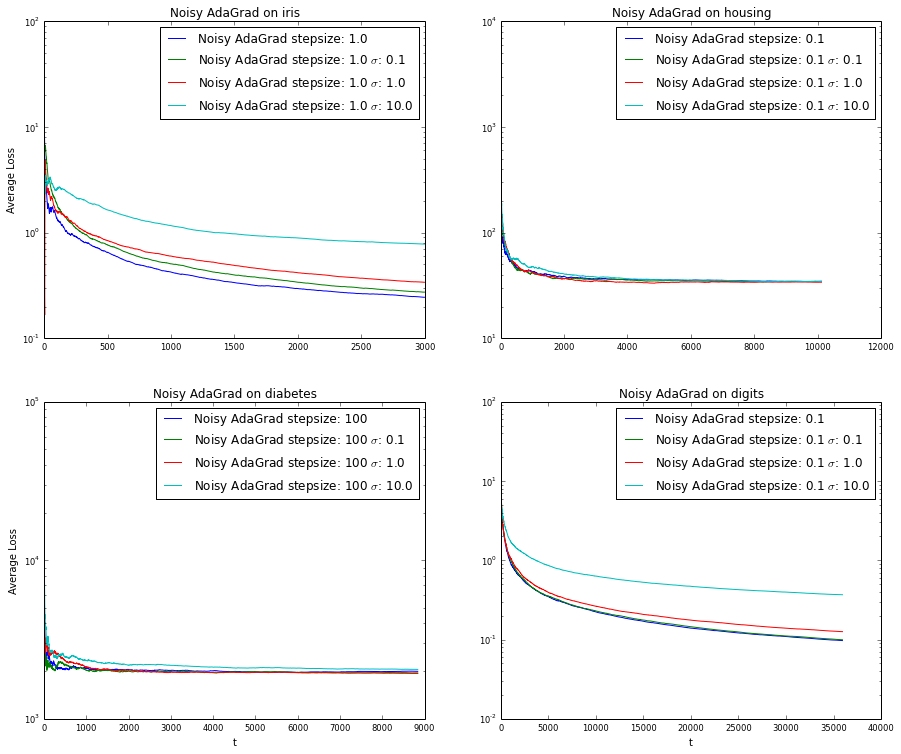

In [11]:
# <!-- collapse=True -->
adagradbest = {}
adagradbest["digits"] = [0.1]
adagradbest["iris"] = [1.0]
adagradbest["housing"] = [0.1]
adagradbest["diabetes"] = [100]

plotalgorithms(datasets,[(adagrad,"Noisy AdaGrad",adagradbest,'red')],steplabels=True,
                           passes = 20,sigmas = [0,0.1,1.0,10.0])

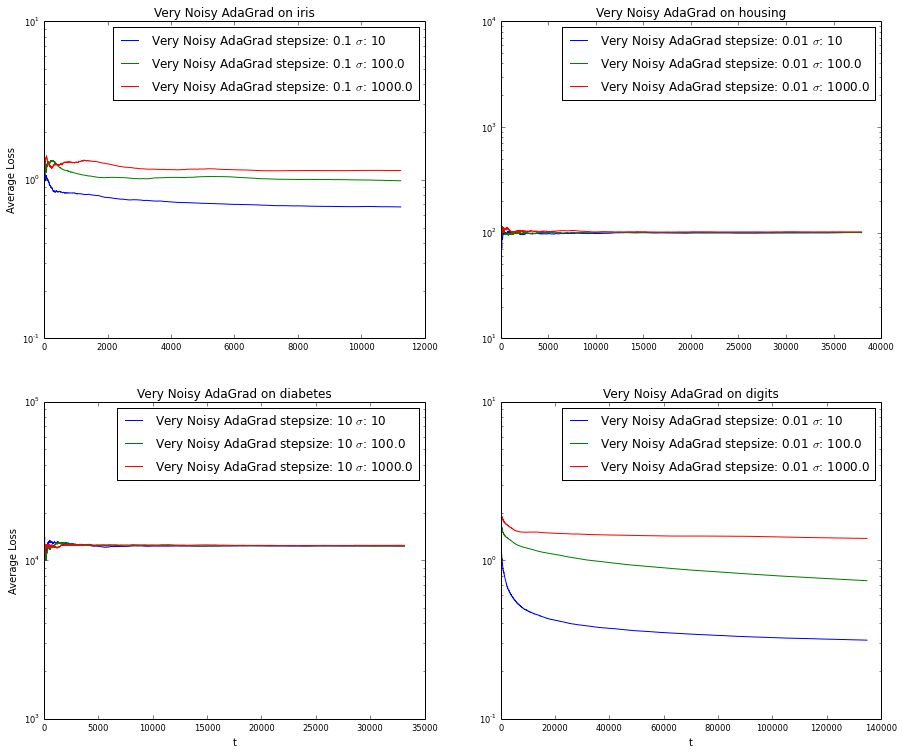

In [5]:
# <!-- collapse=True -->
adagradbest = {}
adagradbest["digits"] = [0.01]
adagradbest["iris"] = [0.1]
adagradbest["housing"] = [0.01]
adagradbest["diabetes"] = [10]

plotalgorithms(datasets,[(adagrad,"Very Noisy AdaGrad",adagradbest,'red')],steplabels=True,
                           passes = 75,sigmas = [10,100.0,1000.0])

So hopefully this is what you expected to see: more noise makes life harder. However, as you can see we still do fairly well until the noise becomes so large that it really swamps our the signal in the gradient. At this point we would expect to have to wait a very long time before we see low average regret.


<h3>Making the Problem Harder: No Gradients at All</h3>

So far we've shown that subjecting our algorithms to noisy losses often isn't such a horrible thing to do. So, naturally, we go looking for ways to make life harder. Notice that all our first order methods so far didn't need to know anything about the broader shape of the loss functions $f_t$ - they only needed the gradient. Even a noisy gradient is good enough. Can we do with even less information? Suppose instead of getting $z_t\in \partial f_t(w_t)$, we only get the value $f_t(w_t)$. That is, instead of getting the full loss function, or even the gradient of the loss function, we just get to evaluate the loss function at $w_t$. On this first blush, this sounds like an impossible scenario: how can I possibly know anything with just this info? Surely the environment can just shift loss functions around in some way so that I don't get any information at all!

Well of course this is true. If we make no assumptions at all, then a truly antagonistic environment can easily make this impossible. For example, consider losses of the form $f_t(w)=a(w-b)^2+c$ for $w\in[0,1]$. The environment can always ensure that $f_t(w_t)=1$ for all $t$, while setting $f_t(w^*)=0$ whenever $w_t\ne w^*$ for any $w^*$ chosen in advance. Clearly there is no algorithm that can achieve sublinear regret in this case. However, notice that the environment is actually extremely powerful in this scenario: it's allowed to give loss functions that are arbitrarily steep. For example, consider the algorithm that tries all $w_t$ on a grid of width $\frac{1}{2^k}$ for successively larger $k$, and when it finds two adjacent points with smaller losses it will restrict itself to searching between those points. Then for any $\epsilon$, there is a $t$ such that $|w_t-w^*|\le \epsilon$, and so $\frac{d}{dw}f_t(w_t)\ge \frac{1}{\epsilon}$. This is somewhat unreasonable - even our normal first order methods can't do well when this sort of thing happens. Thus there is some hope that with some sort of reasonable conditions we can finesse a good solution out of this scenario.

<h4> An example problem: Choosing the optimal dose </h4>

As a little motivation, consider the case of deciding the correct dosing for some medication. We can choose to give patient $t$ a dose of amount $w_t$, and then we observe how the patient responds to the drug - either their disease progresses, or they have some bad reactions (high $f_t(w_t)$), or they get better (low $f_t(w_t)$). We don't really know anything about what $f_t$ looks like for this patient (or for any patient). It's also not possible to compute a numerical gradient by giving the patient two different doses to compute 

$$
z_t\approx\frac{f_t(w_t)-f_t(w_t')}{w_t-w_t'}
$$

We can only (and probably <i>should</i> only) treat the patient once! Really all we get is $f_t(w_t)$. But still we'd still like to minimize

$$
\text{Regret}_T = \sum_{t=1}^T f_t(w_t)-\inf_{w}\sum_{t=1}^T f_t(w)
$$

since minimizing this quantity exactly represents doing just as well as treating patients with the optimal dose.

<h4>Gradient Descent without a Gradient</h4>

Our strategy here will be to use a clever trick to construct an estimate of the gradient from only a single function evaluation. Before describing how we do this though, it's important to formally notice a fact that has been in some sense implicit in all the previous analysis. Previously we've been able to assume that the environment has chosen loss functions $f_1,\dots,f_T$ and committed to them all in advance of our algorithm running; we need not worry about trying to model some sort of "adaptiveness" in the environment in which it chooses $f_{t+1}$ based upon the algorithms previous behavior. This is because in the past we have always bounded regret with respect to <i>any</i> pre-committed choice of loss functions. In particular, the environment <i>could</i> have pre-committed to whatever adaptively chosen sequene of losses we might be worried about. Since our bound applied to all pre-comitted sequences of loss functions, it must therefore apply to any adaptively chosen sequence.

However, now things are a little less clear. As foreshadowed, our strategy will be to use our single loss-function evaluation to generate an estimate of the gradient. To do so we'll need to make use of some randomness, and if the environment knows what this randomness is ahead of time it can choose loss functions that will confuse our estimate. Therefore we'll need to make the assumption that the environment doesn't know about the random values we choose. In particular, we'll assume that the environment pre-commits to some sequence of loss functiosn $f_1,\dots,f_T$ without knowledge of any random numbers generated by our algorithm. This is somewhat stronger than we need - really it's only necessary that $f_t$ be chosen without knowledge of any randomness used by our algorithm in the $t$th round, but this fixed-sequence assumption is simpler to think about.

So with this in mind, let's suppose that $f_1,\dots,f_T$ are some fixed sequence of loss functions that we'll have to content with. How can we estimate a subgradient of $f_t(w_t)$? Here's what we do: instead of computing $f_t(w_t)$, choose a random vector $v_t$ with $\|v_t\| = 1$. Then set

$$
\hat z_t = \frac{d}{\delta}f_t(w_t+\delta v_t)v_t
$$

where $w_t\in \R^d$. What is going on here? It turns out that $\hat z_t$ is an unbiased estimate of $\nabla \hat f_t(w_t)$ where $\hat f_t$ is a kind of "smoothed" approximation to $f_t$. Specifically:

$$
\hat f_t(w) = \E_{v\sim U(B)}\left[f(w+\delta v)\right]
$$

where $U(B)$ is the uniform distribution over the $d$-dimensional unit ball. In words, $\hat f_t(w)$ is the average value of $f_t$ on a ball of radius $\delta$ centered at $w$. Thus for small $\delta$, we should expect $\hat f_t(w)\approx f_t(w)$.

Let's show that our estimate does what we just said it does. That is,

$$
\E[\hat z_t] = \E_{v\sim U(S)} \left[ \frac{d}{\delta}f_t(w_t+\delta v)v\right ] = \nabla \hat f_t(w_t)
$$

where $U(S)$ is the uniform distribution over the unit sphere in $\R^d$. To do this we'll go through a careful application of Stokes' theorem. In particular, we're going to be using the following consequence of the theorem: For any region $D\subset \R^n$ and a function $f:\R^n\to \R$, we have

$$
\nabla \int_{D} f(w+v)dv=\int_{\partial D} f(w+v)n\ dv
$$

where $n$ is the normal vector to $\partial D$ (the boundary of $D$) at $w+v$.

<div style="margin-left: 3em; margin-right: 6em;" class="aside">
<p>

To be honest, my Stokes' theorem is a little rusty, so let's try to prove this. The $i$th component of the gradient is

$$
\begin{align*}
\frac{\partial}{\partial w_i} \int_{D} f(w+v)dv &= \int_D \frac{\partial}{\partial w_i} f(w+v)dv_1\cdots dv_n\\
&=\int_D \frac{\partial}{\partial v_i} f(w+v)dv_1\cdots dv_n\\
&=\int_{D} (-1)^{i-1}d(f\ dv_1\cdots dv_{i-1}dv_{i+1}\cdots dv_{n})\\
&=\int_{\partial D} (-1)^{i-1}f\ dv_1\cdots dv_{i-1}dv_{i+1}\cdots dv_{n}
\end{align*}
$$

Let $U_x$ be a special orthogonal matrix such that the first $n-1$ rows of $U$ span the tangent space to $\partial D$ at $x$. Then consider the change of variables $(u_1,\dots,u_n)^T=U_x(v_1,\dots,v_n)^T$ so that $du_1\cdots du_{n-1}$ is the volume form on $\partial D$. Then it suffices to show that the determinant of Jacobian matrix for the change of coordinates

$$
(u_1,\dots,u_{n-1})\to (v_1,\dots,v_{i-1},v_{i+1},\dots,v_n)
$$

is $(-1)^{i-1}$ times the reciprocal of the $i$th coordinate of the normal to $\partial D$. If you work through some definitions, this is equivalent to the statement that the determinant of the $n,i$th minor of $U$ is $(-1)^{i-1}$ times the $n,i$th entry of $U$, $U_{n,i}$. Let $M_{n,i}$ be the determinant of the $n,i$th minor of $U$. Now since the determinant of $U$ is 1, and $U$ is orthonormal, this implies that the projection of the vector $M=(M_{n,1},-M_{n,2},\dots,(-1)^{n-1}M_{n,n})$ onto the last row of $U$ is 1. Further, since replacing the last row of $U$ with any other row of $U$ results in a matrix of determinant $0$, the projection of $M$ onto any other row of $U$ is 0. Since $U$ is orthonormal, this implies that $M$ is equal to the last row of $U$, which is what we wanted to show.

</p>
</div>


Ok, back to work. We'll use $B(\delta)$ and $S(\delta)$ to indicate the ball and sphere of radius $\delta$ in $\R^d$, and we'll drop the subscripts $t$ for notational convenience:

$$
\newcommand{\vol}{\text{Vol}}
\begin{align*}
\nabla \hat f(w) &= \nabla \frac{1}{\vol(B)}\int_{B} f(w+\delta v)\ dv\\
&=\nabla \frac{1}{\vol(B(\delta))}\int_{B(\delta)} f(w+v')dv'\\
&=\frac{1}{\vol(B(\delta))}\int_{S(\delta)} f(w+v')\frac{v'}{\|v'\|}dv'\\
&=\frac{\vol(S(\delta))}{\vol(B(\delta))}\left[\frac{1}{\vol(S(\delta))}\int_{S(\delta)}f(w+v')\frac{v'}{\delta}dv'\right]\\
&=\frac{d}{\delta} \left[\frac{1}{\delta^{d-1}\vol(S)}\int_{S} f(w+\delta v)v\delta^{n-1}dv\right]\\
&=\E_{v\sim U(S)} \left[ \frac{d}{\delta}f_t(w_t+\delta v)v\right ] 
\end{align*}
$$

where here we've made use of the form of stokes' theorem that says for any function $f$,

$$
\int_{D} \nabla f dV = \int_{\partial D} f n dS
$$

where $n$ is the normal to $\partial D$. We also made use of the fact that the surface area to volume ratio of a ball of radius $\delta$ in $\R^d$ is $\frac{d}{\delta}$.

Now we're almost ready to go. The plan is to simply apply any online learning algorithm to our new estimated subgradients. However, there are two things that need to be accounted for:

<ol>

<li> Our estimates are for subgradients of $\hat f_t$, not $f_t$.</li>
<li> In the process of generating our estimates, we actually played $w_t+\delta v_t$ rather than $w_t$. Thus our loss incurred will be $f_t(w_t+\delta v_t)$ instead of $f_t(w_t)$.</li>

</ol>

In order to take care of these issues, we need to have some assumptions about our feasible set and the functions $f_t$. Our assumptions will be:

<ol>

<li> Each $f_t$ is $L$-Lipschitz.</li>
<li> The feasible set $S$ has $B=\max_{u\in S}\|u\|$.</li>
<li> Each $f_t$ is actually defined on a neighborhood of radius $\delta$ about $S$.
<li> $F = \max_t \max_{u\in S} \|f_t(u)\|$.</li>

</ol>


Under these assumptions, suppose we run the constant step-size online gradient descent algorithm with step-size $\eta$. That is:

$$
w_{t+1} = \Pi_S\left[w_t + \eta \frac{d}{\delta} f_t(w_t+\delta v_t)\right]
$$

Then what is our regret?

First we'll bound regret with respect to $\hat f$, and then we'll relate $\hat f$ to $f$. To bound regret with respect to $\hat f$, we'll bound

$$
\sum_{t=1}^T \hat f_t(w_t)-\hat f_t(u)
$$

This is just the regret that we'd have obtained if we'd actually played $w_t$ and obtained unbiased estimates of $z_t\in \partial \hat f_t(w_t)$.

Thus using our estimated gradients regret bound, we have

$$
\sum_{t=1}^T \hat f_t(w_t)-\hat f_t(u) \le \E[\text{Regret}_T(u,\hat z_1,\dots,\hat z_T)]
$$

Now since $f_t$ is $L$-Lipschitz, we have

$$
\|f_t(w)-f_t(w+\delta v)\|\le L\delta
$$

for all $v$ with $\|v\|=1$. Therefore

$$
\|f_t(w)-\hat f_t(w)\|\le L\delta
$$

and so we can pass from $\hat f_t$ to $f_t$:

$$
\sum_{t=1}^T  f_t(w_t) -  f_t(u)  \le \E[\text{Regret}_T(u,\hat z_1,\dots,\hat z_T)]+2LT\delta
$$

Now again, we have $f_t(w_t)\le f_t(w_t+\delta v_t)+\delta L$ since $f_t$ is $L$-Lipschitz. Thus we have

$$
\sum_{t=1}^T  f_t(w_t+\delta v_t) -  f_t(u)  \le \E[\text{Regret}_T(u,\hat z_1,\dots,\hat z_T)]+3LT\delta
$$

Now to finish up we need a bound on size of the estimated gradients $\hat z_t$. For this, we have

$$
\|\hat z_t\| = \frac{d}{\delta}\|f_t(w_t+\delta v_t)\| \le \frac{d}{\delta}\left(\|f_t(w_t)\|+L\delta\right)\le \frac{d}{\delta}\left(F+L\delta\right)
$$

Therefore

$$
\|\hat z_t\|^2\le \frac{d^2}{\delta^2}(F+L\delta)^2
$$

Notice that we can't just say $\|\hat z_t\|^2 \le \frac{d^2}{\delta^2} F^2$ because $w_t+\delta v_t$ may not be inside $S$.

Now recall the regret bound for constant step-size gradient descent:

$$
\text{Regret}_T(u,z_1,\dots,z_T) \le \frac{\|u\|^2}{2\eta} + \frac{\eta}{2} \sqrt{\sum_{t=1}^T \|z_t\|^2}
$$

So plugging in our bound on $\|\hat z_t\|^2$, our regret is

$$
\E[\text{Regret}_T(u)] \le \frac{\|u\|^2}{2\eta} + \frac{\eta}{2}T\frac{d^2}{\delta^2}(F+L\delta)^2+3L\delta T
$$

Now if $\|u\|\le B$, we optimize terms by setting

$$
\begin{align*}
\delta &= \sqrt{\frac{BdF}{3L}}T^{-1/4}\\
\eta &= \frac{B}{\sqrt{T}\frac{d}{\delta}(F+L\delta)}
\end{align*}
$$

which gives

$$
\E[\text{Regret}_T(u)]\le 2\sqrt{3BdFL}T^{3/4}+BdL\sqrt{T}
$$

This is still sublinear in $T$, but notice that we've paid a steep price for losing so much information - regret now grows as $T^{3/4}$ instead of $\sqrt{T}$.

Also notice that while we worked through this for the specific case of constant step-size gradient descent, the argument is fairly general. With the exception of the last few lines, we can easily port the argument to any first-order learning algorithm to derive a regret bound.

This "gradientless" gradient descent algorithm here came from <a href = http://arxiv.org/abs/cs/0408007>this</a> excellent paper.

In any event, let's see how well this scheme works on our test datasets:

In [6]:
# <!-- collapse=False -->
def nogradient_ogd(winit,lossandgrad,step,T,delta):
    """runs T steps of online-gradient-descent-without-a-gradient
    
            winit: vector in R^n, used for initial prediction
            lossandgrad: a function taking two arguments:
                    lossandgrad(w,t) where w is the current prediction and t is the iteration number.
                    should return l,g where l is the loss and g is the gradient
            step: stepsize multiplier.
            delta: perturbation value to use for one-shot gradient estimate."""
    
    w = np.copy(winit)
    totloss = 0
    loss = np.zeros(T)
    
    d = len(w.flatten())
    for t in xrange(T):
        v = np.random.normal(0,1,np.shape(w))
        v = v/np.linalg.norm(v)
        l,g = lossandgrad(w+delta*v,t)
        totloss += l
        w = w - step*d*l*v/delta
        loss[t]=totloss/(t+1)
    return {"loss":loss}


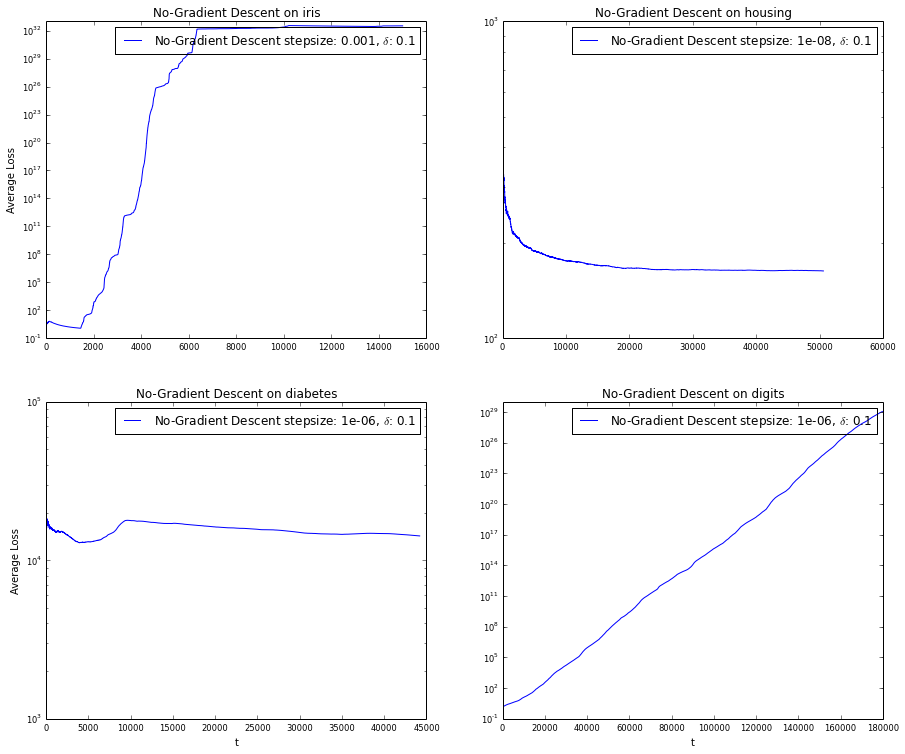

In [7]:
# <!-- collapse=True -->
nogradbest = {}
nogradbest["digits"] = [0.000001]
nogradbest["iris"] =   [0.001]
nogradbest["housing"] =[0.00000001]
nogradbest["diabetes"]=[0.000001]

plotalgorithms(datasets,[(nogradient_ogd,"No-Gradient Descent",nogradbest,'red')],
                       steplabels=True,
                           passes = 100,deltas = [0.1])

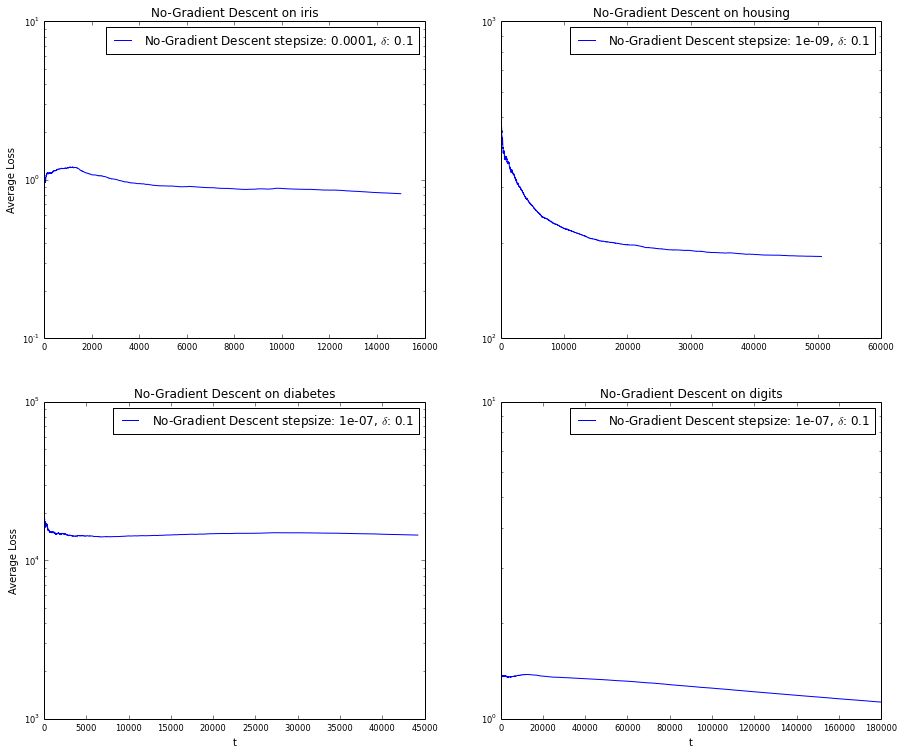

In [8]:
# <!-- collapse=True -->
nogradbest = {}
nogradbest["digits"] = [0.0000001]
nogradbest["iris"] =   [0.0001]
nogradbest["housing"] =[0.000000001]
nogradbest["diabetes"]=[0.0000001]

plotalgorithms(datasets,[(nogradient_ogd,"No-Gradient Descent",nogradbest,'red')],
                       steplabels=True,
                           passes = 100,deltas = [0.1])

This doesn't seem to be doing that well at all! It seems that if we are only allowed to know $f_t(w_t)$ and don't get any gradient information then things really look bad. Notice that I had to crank down the stepsizes quite a lot in order to not have the losses blow up, and as a result the losses don't go down very much either. Previously we noticed that using an AdaGrad style update can help with this kind of instability, so let's try that instead.

In [9]:
# <!-- collapse=False -->
def nogradient_adagrad(winit,lossandgrad,step,T,delta0,box=None):
    """runs T steps of online-gradient-descent-without-a-gradient using an adagrad-style conditioning
    
            winit: vector in R^n, used for initial prediction
            lossandgrad: a function taking two arguments:
                    lossandgrad(w,t) where w is the current prediction and t is the iteration number.
                    should return l,g where l is the loss and g is the gradient
            step: stepsize multiplier.
            delta: perturbation value to use for one-shot gradient estimate.
            box: constaints - each coordinate must have absolute value at most box"""
    
    w = np.copy(winit)
    totloss = 0
    loss = np.zeros(T)
    L = 0.00000001 #set this to a small value to deal with divide-by-zero errors
    d = len(w.flatten())
    delta = delta0
    for t in xrange(T):
        v = np.random.normal(0,1,np.shape(w))
        v = v/np.linalg.norm(v)
        l,g = lossandgrad(w+delta*v,t)

        gest = d*(l-totloss/(t+1))*v/delta
        totloss += l

        L += gest**2

        w = w - step/(np.sqrt(L)*np.sqrt(2))*gest

        if(box != None):
            w = np.clip(w,-box,box)
            
        loss[t]=totloss/(t+1)
    return {"loss":loss}


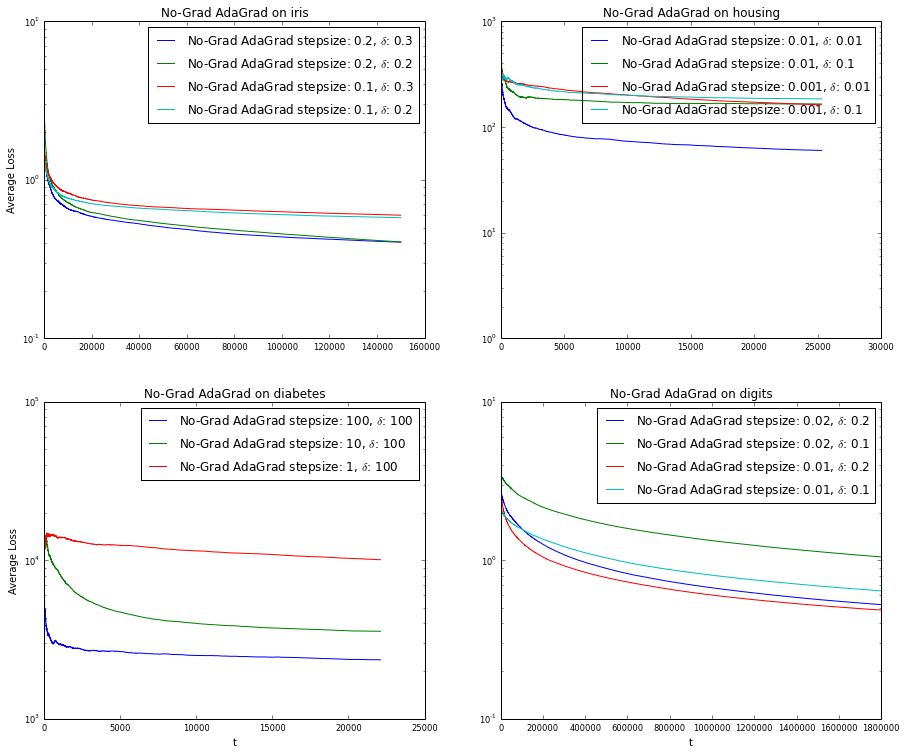

In [10]:
# <!-- collapse=True -->
noadagradbest = {}
noadagradbest["digits"] = [0.02,0.01]
noadagradbest["iris"] =   [0.2,0.1]
noadagradbest["housing"] =[0.01,0.001]
noadagradbest["diabetes"]=[100,10,1]

noadagrad_deltas = {}
noadagrad_deltas["digits"] = [0.2,0.1]
noadagrad_deltas["housing"] = [0.01,0.1]
noadagrad_deltas["diabetes"] = [100]
noadagrad_deltas["iris"] = [0.3,0.2]

passes = {}
passes["digits"]=1000
passes["iris"]= 1000
passes["housing"]=50
passes["diabetes"]=50

plotalgorithms(datasets,[(nogradient_adagrad,
                            "No-Grad AdaGrad",noadagradbest,'red')],
                       steplabels=True,
                           passes = passes,deltas = noadagrad_deltas)

This is working quite a bit better! However, it should be noted that I went through quite a bit of hyperparameter searching in order to set set the stepsizes and $\delta$ values shown here. Also note that the digits and iris dataset are being run for 10 times more iterations than previously, and with digits we still don't get down to the best average loss of about $0.1$. This large slowdown is the price we're paying for losing so much information about the shape of the loss functions.